In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from scipy.stats import *
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import os

In [2]:
boston = load_boston()

sns.set()
df = pd.DataFrame( boston.data, columns=boston.feature_names)

/Users/thomasnguyen/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [7]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.shape

(506, 13)

In [9]:
df["MEDV"] = boston.target

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
from sklearn.decomposition import PCA

# Scaling the data

In [12]:
def scalefunc(data):
    length = data.shape[0]
    scaled_df = (data-np.mean(data, axis=0)) / np.std(data, axis=0)
    return scaled_df
scaled_data = scalefunc(df)

In [13]:
scaled_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


In [14]:
scaled_data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# Calculating Model Performance

In [15]:
scaled_data = scaled_data.dropna()

In [26]:
scaled_data.shape

(506, 14)

In [16]:
lm = LinearRegression()
X = scaled_data.drop(["NOX"], axis=1)
y = scaled_data["INDUS"].values.reshape(-1,1)

lm.fit(X, y)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_pred = lm.predict(X_test)

In [17]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=6542, learning_rate=0.02, loss_function="RMSE")
model.fit(X_train, y_train, eval_set = (X_test, y_test), )
print (model.score(X, y))

0:	learn: 0.9781380	test: 1.0076602	best: 1.0076602 (0)	total: 57.7ms	remaining: 6m 17s
1:	learn: 0.9623441	test: 0.9925070	best: 0.9925070 (1)	total: 58.4ms	remaining: 3m 10s
2:	learn: 0.9476514	test: 0.9770424	best: 0.9770424 (2)	total: 59ms	remaining: 2m 8s
3:	learn: 0.9329357	test: 0.9616283	best: 0.9616283 (3)	total: 59.6ms	remaining: 1m 37s
4:	learn: 0.9176790	test: 0.9463966	best: 0.9463966 (4)	total: 60.2ms	remaining: 1m 18s
5:	learn: 0.9025487	test: 0.9311183	best: 0.9311183 (5)	total: 60.8ms	remaining: 1m 6s
6:	learn: 0.8880496	test: 0.9165083	best: 0.9165083 (6)	total: 61.4ms	remaining: 57.3s
7:	learn: 0.8738480	test: 0.9021511	best: 0.9021511 (7)	total: 62.7ms	remaining: 51.2s
8:	learn: 0.8590396	test: 0.8876853	best: 0.8876853 (8)	total: 63.4ms	remaining: 46s
9:	learn: 0.8457935	test: 0.8743556	best: 0.8743556 (9)	total: 63.9ms	remaining: 41.8s
10:	learn: 0.8323823	test: 0.8602587	best: 0.8602587 (10)	total: 64.6ms	remaining: 38.3s
11:	learn: 0.8192600	test: 0.8476851	best

275:	learn: 0.0502713	test: 0.0768635	best: 0.0768635 (275)	total: 251ms	remaining: 5.7s
276:	learn: 0.0499940	test: 0.0765792	best: 0.0765792 (276)	total: 252ms	remaining: 5.7s
277:	learn: 0.0497058	test: 0.0763401	best: 0.0763401 (277)	total: 253ms	remaining: 5.7s
278:	learn: 0.0494633	test: 0.0760675	best: 0.0760675 (278)	total: 254ms	remaining: 5.69s
279:	learn: 0.0492757	test: 0.0758427	best: 0.0758427 (279)	total: 254ms	remaining: 5.69s
280:	learn: 0.0490096	test: 0.0756959	best: 0.0756959 (280)	total: 255ms	remaining: 5.68s
281:	learn: 0.0488446	test: 0.0756061	best: 0.0756061 (281)	total: 256ms	remaining: 5.68s
282:	learn: 0.0485883	test: 0.0753081	best: 0.0753081 (282)	total: 257ms	remaining: 5.68s
283:	learn: 0.0483132	test: 0.0750184	best: 0.0750184 (283)	total: 258ms	remaining: 5.67s
284:	learn: 0.0480205	test: 0.0747489	best: 0.0747489 (284)	total: 258ms	remaining: 5.67s
285:	learn: 0.0477746	test: 0.0744714	best: 0.0744714 (285)	total: 259ms	remaining: 5.66s
286:	learn: 0

547:	learn: 0.0215325	test: 0.0498884	best: 0.0498884 (547)	total: 445ms	remaining: 4.87s
548:	learn: 0.0214830	test: 0.0498704	best: 0.0498704 (548)	total: 446ms	remaining: 4.86s
549:	learn: 0.0214576	test: 0.0498650	best: 0.0498650 (549)	total: 446ms	remaining: 4.86s
550:	learn: 0.0213848	test: 0.0498593	best: 0.0498593 (550)	total: 447ms	remaining: 4.86s
551:	learn: 0.0213519	test: 0.0498377	best: 0.0498377 (551)	total: 448ms	remaining: 4.86s
552:	learn: 0.0212770	test: 0.0497556	best: 0.0497556 (552)	total: 448ms	remaining: 4.85s
553:	learn: 0.0212413	test: 0.0497180	best: 0.0497180 (553)	total: 449ms	remaining: 4.85s
554:	learn: 0.0212016	test: 0.0496857	best: 0.0496857 (554)	total: 449ms	remaining: 4.85s
555:	learn: 0.0211653	test: 0.0496913	best: 0.0496857 (554)	total: 450ms	remaining: 4.84s
556:	learn: 0.0211292	test: 0.0496473	best: 0.0496473 (556)	total: 451ms	remaining: 4.84s
557:	learn: 0.0210999	test: 0.0496128	best: 0.0496128 (557)	total: 451ms	remaining: 4.84s
558:	learn

816:	learn: 0.0131898	test: 0.0444908	best: 0.0444908 (816)	total: 639ms	remaining: 4.47s
817:	learn: 0.0131703	test: 0.0444819	best: 0.0444819 (817)	total: 640ms	remaining: 4.47s
818:	learn: 0.0131440	test: 0.0445015	best: 0.0444819 (817)	total: 640ms	remaining: 4.47s
819:	learn: 0.0131184	test: 0.0444958	best: 0.0444819 (817)	total: 641ms	remaining: 4.47s
820:	learn: 0.0130933	test: 0.0444725	best: 0.0444725 (820)	total: 642ms	remaining: 4.47s
821:	learn: 0.0130745	test: 0.0444624	best: 0.0444624 (821)	total: 642ms	remaining: 4.47s
822:	learn: 0.0130543	test: 0.0444733	best: 0.0444624 (821)	total: 643ms	remaining: 4.47s
823:	learn: 0.0130169	test: 0.0444486	best: 0.0444486 (823)	total: 644ms	remaining: 4.46s
824:	learn: 0.0130062	test: 0.0444523	best: 0.0444486 (823)	total: 644ms	remaining: 4.46s
825:	learn: 0.0129832	test: 0.0444397	best: 0.0444397 (825)	total: 645ms	remaining: 4.46s
826:	learn: 0.0129644	test: 0.0444241	best: 0.0444241 (826)	total: 646ms	remaining: 4.46s
827:	learn

1092:	learn: 0.0088827	test: 0.0428674	best: 0.0428674 (1092)	total: 833ms	remaining: 4.15s
1093:	learn: 0.0088670	test: 0.0428617	best: 0.0428617 (1093)	total: 834ms	remaining: 4.15s
1094:	learn: 0.0088590	test: 0.0428631	best: 0.0428617 (1093)	total: 834ms	remaining: 4.15s
1095:	learn: 0.0088462	test: 0.0428569	best: 0.0428569 (1095)	total: 835ms	remaining: 4.15s
1096:	learn: 0.0088335	test: 0.0428479	best: 0.0428479 (1096)	total: 835ms	remaining: 4.15s
1097:	learn: 0.0088212	test: 0.0428401	best: 0.0428401 (1097)	total: 836ms	remaining: 4.14s
1098:	learn: 0.0088178	test: 0.0428394	best: 0.0428394 (1098)	total: 837ms	remaining: 4.14s
1099:	learn: 0.0088060	test: 0.0428301	best: 0.0428301 (1099)	total: 838ms	remaining: 4.14s
1100:	learn: 0.0087964	test: 0.0428313	best: 0.0428301 (1099)	total: 838ms	remaining: 4.14s
1101:	learn: 0.0087814	test: 0.0428199	best: 0.0428199 (1101)	total: 839ms	remaining: 4.14s
1102:	learn: 0.0087728	test: 0.0428083	best: 0.0428083 (1102)	total: 839ms	remai

1363:	learn: 0.0063341	test: 0.0422782	best: 0.0422782 (1363)	total: 1.03s	remaining: 3.9s
1364:	learn: 0.0063238	test: 0.0422801	best: 0.0422782 (1363)	total: 1.03s	remaining: 3.89s
1365:	learn: 0.0063110	test: 0.0422748	best: 0.0422748 (1365)	total: 1.03s	remaining: 3.89s
1366:	learn: 0.0063096	test: 0.0422745	best: 0.0422745 (1366)	total: 1.03s	remaining: 3.89s
1367:	learn: 0.0063051	test: 0.0422757	best: 0.0422745 (1366)	total: 1.03s	remaining: 3.89s
1368:	learn: 0.0062933	test: 0.0422713	best: 0.0422713 (1368)	total: 1.03s	remaining: 3.89s
1369:	learn: 0.0062846	test: 0.0422713	best: 0.0422713 (1369)	total: 1.03s	remaining: 3.89s
1370:	learn: 0.0062735	test: 0.0422725	best: 0.0422713 (1369)	total: 1.03s	remaining: 3.89s
1371:	learn: 0.0062679	test: 0.0422716	best: 0.0422713 (1369)	total: 1.03s	remaining: 3.89s
1372:	learn: 0.0062620	test: 0.0422687	best: 0.0422687 (1372)	total: 1.03s	remaining: 3.89s
1373:	learn: 0.0062531	test: 0.0422689	best: 0.0422687 (1372)	total: 1.03s	remain

1603:	learn: 0.0048709	test: 0.0419625	best: 0.0419625 (1603)	total: 1.22s	remaining: 3.76s
1604:	learn: 0.0048612	test: 0.0419639	best: 0.0419625 (1603)	total: 1.22s	remaining: 3.76s
1605:	learn: 0.0048608	test: 0.0419632	best: 0.0419625 (1603)	total: 1.22s	remaining: 3.76s
1606:	learn: 0.0048514	test: 0.0419589	best: 0.0419589 (1606)	total: 1.22s	remaining: 3.76s
1607:	learn: 0.0048451	test: 0.0419578	best: 0.0419578 (1607)	total: 1.22s	remaining: 3.76s
1608:	learn: 0.0048345	test: 0.0419523	best: 0.0419523 (1608)	total: 1.23s	remaining: 3.75s
1609:	learn: 0.0048260	test: 0.0419554	best: 0.0419523 (1608)	total: 1.23s	remaining: 3.75s
1610:	learn: 0.0048205	test: 0.0419556	best: 0.0419523 (1608)	total: 1.23s	remaining: 3.76s
1611:	learn: 0.0048145	test: 0.0419525	best: 0.0419523 (1608)	total: 1.23s	remaining: 3.76s
1612:	learn: 0.0048103	test: 0.0419528	best: 0.0419523 (1608)	total: 1.23s	remaining: 3.75s
1613:	learn: 0.0048054	test: 0.0419522	best: 0.0419522 (1613)	total: 1.23s	remai

1853:	learn: 0.0037878	test: 0.0418339	best: 0.0418292 (1846)	total: 1.42s	remaining: 3.58s
1854:	learn: 0.0037840	test: 0.0418335	best: 0.0418292 (1846)	total: 1.42s	remaining: 3.58s
1855:	learn: 0.0037800	test: 0.0418312	best: 0.0418292 (1846)	total: 1.42s	remaining: 3.58s
1856:	learn: 0.0037751	test: 0.0418296	best: 0.0418292 (1846)	total: 1.42s	remaining: 3.58s
1857:	learn: 0.0037687	test: 0.0418270	best: 0.0418270 (1857)	total: 1.42s	remaining: 3.58s
1858:	learn: 0.0037656	test: 0.0418258	best: 0.0418258 (1858)	total: 1.42s	remaining: 3.57s
1859:	learn: 0.0037588	test: 0.0418248	best: 0.0418248 (1859)	total: 1.42s	remaining: 3.57s
1860:	learn: 0.0037547	test: 0.0418243	best: 0.0418243 (1860)	total: 1.42s	remaining: 3.57s
1861:	learn: 0.0037536	test: 0.0418254	best: 0.0418243 (1860)	total: 1.42s	remaining: 3.57s
1862:	learn: 0.0037492	test: 0.0418231	best: 0.0418231 (1862)	total: 1.42s	remaining: 3.57s
1863:	learn: 0.0037465	test: 0.0418219	best: 0.0418219 (1863)	total: 1.42s	remai

2121:	learn: 0.0030289	test: 0.0417898	best: 0.0417815 (2042)	total: 1.61s	remaining: 3.35s
2122:	learn: 0.0030258	test: 0.0417908	best: 0.0417815 (2042)	total: 1.61s	remaining: 3.35s
2123:	learn: 0.0030225	test: 0.0417894	best: 0.0417815 (2042)	total: 1.61s	remaining: 3.35s
2124:	learn: 0.0030186	test: 0.0417881	best: 0.0417815 (2042)	total: 1.61s	remaining: 3.35s
2125:	learn: 0.0030139	test: 0.0417893	best: 0.0417815 (2042)	total: 1.61s	remaining: 3.35s
2126:	learn: 0.0030114	test: 0.0417881	best: 0.0417815 (2042)	total: 1.61s	remaining: 3.35s
2127:	learn: 0.0030076	test: 0.0417875	best: 0.0417815 (2042)	total: 1.61s	remaining: 3.35s
2128:	learn: 0.0030058	test: 0.0417875	best: 0.0417815 (2042)	total: 1.61s	remaining: 3.35s
2129:	learn: 0.0030056	test: 0.0417874	best: 0.0417815 (2042)	total: 1.61s	remaining: 3.35s
2130:	learn: 0.0030034	test: 0.0417878	best: 0.0417815 (2042)	total: 1.62s	remaining: 3.35s
2131:	learn: 0.0030001	test: 0.0417885	best: 0.0417815 (2042)	total: 1.62s	remai

2394:	learn: 0.0023904	test: 0.0417308	best: 0.0417249 (2372)	total: 1.8s	remaining: 3.12s
2395:	learn: 0.0023898	test: 0.0417308	best: 0.0417249 (2372)	total: 1.8s	remaining: 3.12s
2396:	learn: 0.0023882	test: 0.0417306	best: 0.0417249 (2372)	total: 1.8s	remaining: 3.12s
2397:	learn: 0.0023864	test: 0.0417296	best: 0.0417249 (2372)	total: 1.8s	remaining: 3.12s
2398:	learn: 0.0023824	test: 0.0417299	best: 0.0417249 (2372)	total: 1.8s	remaining: 3.12s
2399:	learn: 0.0023806	test: 0.0417294	best: 0.0417249 (2372)	total: 1.81s	remaining: 3.12s
2400:	learn: 0.0023779	test: 0.0417286	best: 0.0417249 (2372)	total: 1.81s	remaining: 3.12s
2401:	learn: 0.0023771	test: 0.0417290	best: 0.0417249 (2372)	total: 1.81s	remaining: 3.12s
2402:	learn: 0.0023754	test: 0.0417283	best: 0.0417249 (2372)	total: 1.81s	remaining: 3.12s
2403:	learn: 0.0023746	test: 0.0417287	best: 0.0417249 (2372)	total: 1.81s	remaining: 3.12s
2404:	learn: 0.0023726	test: 0.0417311	best: 0.0417249 (2372)	total: 1.81s	remaining:

2650:	learn: 0.0019488	test: 0.0417131	best: 0.0417128 (2638)	total: 2s	remaining: 2.93s
2651:	learn: 0.0019464	test: 0.0417121	best: 0.0417121 (2651)	total: 2s	remaining: 2.93s
2652:	learn: 0.0019459	test: 0.0417125	best: 0.0417121 (2651)	total: 2s	remaining: 2.93s
2653:	learn: 0.0019438	test: 0.0417127	best: 0.0417121 (2651)	total: 2s	remaining: 2.93s
2654:	learn: 0.0019418	test: 0.0417123	best: 0.0417121 (2651)	total: 2s	remaining: 2.93s
2655:	learn: 0.0019410	test: 0.0417122	best: 0.0417121 (2651)	total: 2s	remaining: 2.92s
2656:	learn: 0.0019378	test: 0.0417122	best: 0.0417121 (2651)	total: 2s	remaining: 2.92s
2657:	learn: 0.0019358	test: 0.0417118	best: 0.0417118 (2657)	total: 2s	remaining: 2.92s
2658:	learn: 0.0019351	test: 0.0417116	best: 0.0417116 (2658)	total: 2s	remaining: 2.92s
2659:	learn: 0.0019343	test: 0.0417108	best: 0.0417108 (2659)	total: 2s	remaining: 2.92s
2660:	learn: 0.0019340	test: 0.0417108	best: 0.0417108 (2659)	total: 2s	remaining: 2.92s
2661:	learn: 0.001931

2916:	learn: 0.0015974	test: 0.0417186	best: 0.0417065 (2699)	total: 2.19s	remaining: 2.72s
2917:	learn: 0.0015970	test: 0.0417191	best: 0.0417065 (2699)	total: 2.19s	remaining: 2.72s
2918:	learn: 0.0015950	test: 0.0417194	best: 0.0417065 (2699)	total: 2.19s	remaining: 2.72s
2919:	learn: 0.0015940	test: 0.0417194	best: 0.0417065 (2699)	total: 2.19s	remaining: 2.72s
2920:	learn: 0.0015925	test: 0.0417195	best: 0.0417065 (2699)	total: 2.19s	remaining: 2.72s
2921:	learn: 0.0015910	test: 0.0417196	best: 0.0417065 (2699)	total: 2.19s	remaining: 2.72s
2922:	learn: 0.0015902	test: 0.0417187	best: 0.0417065 (2699)	total: 2.19s	remaining: 2.71s
2923:	learn: 0.0015883	test: 0.0417183	best: 0.0417065 (2699)	total: 2.19s	remaining: 2.71s
2924:	learn: 0.0015857	test: 0.0417205	best: 0.0417065 (2699)	total: 2.19s	remaining: 2.71s
2925:	learn: 0.0015847	test: 0.0417205	best: 0.0417065 (2699)	total: 2.19s	remaining: 2.71s
2926:	learn: 0.0015839	test: 0.0417207	best: 0.0417065 (2699)	total: 2.2s	remain

3186:	learn: 0.0013213	test: 0.0417246	best: 0.0417065 (2699)	total: 2.38s	remaining: 2.51s
3187:	learn: 0.0013200	test: 0.0417244	best: 0.0417065 (2699)	total: 2.38s	remaining: 2.51s
3188:	learn: 0.0013193	test: 0.0417241	best: 0.0417065 (2699)	total: 2.38s	remaining: 2.51s
3189:	learn: 0.0013179	test: 0.0417238	best: 0.0417065 (2699)	total: 2.38s	remaining: 2.51s
3190:	learn: 0.0013161	test: 0.0417240	best: 0.0417065 (2699)	total: 2.38s	remaining: 2.5s
3191:	learn: 0.0013152	test: 0.0417240	best: 0.0417065 (2699)	total: 2.39s	remaining: 2.5s
3192:	learn: 0.0013141	test: 0.0417238	best: 0.0417065 (2699)	total: 2.39s	remaining: 2.5s
3193:	learn: 0.0013140	test: 0.0417239	best: 0.0417065 (2699)	total: 2.39s	remaining: 2.5s
3194:	learn: 0.0013140	test: 0.0417239	best: 0.0417065 (2699)	total: 2.39s	remaining: 2.5s
3195:	learn: 0.0013134	test: 0.0417239	best: 0.0417065 (2699)	total: 2.39s	remaining: 2.5s
3196:	learn: 0.0013128	test: 0.0417237	best: 0.0417065 (2699)	total: 2.39s	remaining: 

3454:	learn: 0.0010866	test: 0.0417114	best: 0.0417065 (2699)	total: 2.58s	remaining: 2.3s
3455:	learn: 0.0010864	test: 0.0417113	best: 0.0417065 (2699)	total: 2.58s	remaining: 2.3s
3456:	learn: 0.0010854	test: 0.0417110	best: 0.0417065 (2699)	total: 2.58s	remaining: 2.3s
3457:	learn: 0.0010850	test: 0.0417110	best: 0.0417065 (2699)	total: 2.58s	remaining: 2.3s
3458:	learn: 0.0010849	test: 0.0417111	best: 0.0417065 (2699)	total: 2.58s	remaining: 2.3s
3459:	learn: 0.0010839	test: 0.0417110	best: 0.0417065 (2699)	total: 2.58s	remaining: 2.3s
3460:	learn: 0.0010836	test: 0.0417108	best: 0.0417065 (2699)	total: 2.58s	remaining: 2.3s
3461:	learn: 0.0010835	test: 0.0417108	best: 0.0417065 (2699)	total: 2.58s	remaining: 2.3s
3462:	learn: 0.0010820	test: 0.0417109	best: 0.0417065 (2699)	total: 2.58s	remaining: 2.3s
3463:	learn: 0.0010806	test: 0.0417105	best: 0.0417065 (2699)	total: 2.58s	remaining: 2.3s
3464:	learn: 0.0010800	test: 0.0417104	best: 0.0417065 (2699)	total: 2.58s	remaining: 2.29

3700:	learn: 0.0009266	test: 0.0417093	best: 0.0417046 (3596)	total: 2.75s	remaining: 2.11s
3701:	learn: 0.0009260	test: 0.0417092	best: 0.0417046 (3596)	total: 2.75s	remaining: 2.11s
3702:	learn: 0.0009252	test: 0.0417090	best: 0.0417046 (3596)	total: 2.75s	remaining: 2.11s
3703:	learn: 0.0009244	test: 0.0417091	best: 0.0417046 (3596)	total: 2.75s	remaining: 2.11s
3704:	learn: 0.0009237	test: 0.0417090	best: 0.0417046 (3596)	total: 2.76s	remaining: 2.11s
3705:	learn: 0.0009229	test: 0.0417089	best: 0.0417046 (3596)	total: 2.76s	remaining: 2.11s
3706:	learn: 0.0009223	test: 0.0417092	best: 0.0417046 (3596)	total: 2.76s	remaining: 2.11s
3707:	learn: 0.0009221	test: 0.0417092	best: 0.0417046 (3596)	total: 2.76s	remaining: 2.11s
3708:	learn: 0.0009218	test: 0.0417092	best: 0.0417046 (3596)	total: 2.76s	remaining: 2.11s
3709:	learn: 0.0009207	test: 0.0417085	best: 0.0417046 (3596)	total: 2.76s	remaining: 2.11s
3710:	learn: 0.0009196	test: 0.0417090	best: 0.0417046 (3596)	total: 2.76s	remai

3970:	learn: 0.0007727	test: 0.0417054	best: 0.0417046 (3596)	total: 2.95s	remaining: 1.91s
3971:	learn: 0.0007724	test: 0.0417055	best: 0.0417046 (3596)	total: 2.95s	remaining: 1.91s
3972:	learn: 0.0007717	test: 0.0417054	best: 0.0417046 (3596)	total: 2.95s	remaining: 1.91s
3973:	learn: 0.0007713	test: 0.0417057	best: 0.0417046 (3596)	total: 2.95s	remaining: 1.91s
3974:	learn: 0.0007709	test: 0.0417055	best: 0.0417046 (3596)	total: 2.95s	remaining: 1.9s
3975:	learn: 0.0007702	test: 0.0417053	best: 0.0417046 (3596)	total: 2.95s	remaining: 1.9s
3976:	learn: 0.0007696	test: 0.0417053	best: 0.0417046 (3596)	total: 2.95s	remaining: 1.9s
3977:	learn: 0.0007689	test: 0.0417053	best: 0.0417046 (3596)	total: 2.95s	remaining: 1.9s
3978:	learn: 0.0007681	test: 0.0417057	best: 0.0417046 (3596)	total: 2.95s	remaining: 1.9s
3979:	learn: 0.0007680	test: 0.0417057	best: 0.0417046 (3596)	total: 2.95s	remaining: 1.9s
3980:	learn: 0.0007670	test: 0.0417054	best: 0.0417046 (3596)	total: 2.95s	remaining: 

4241:	learn: 0.0006457	test: 0.0417012	best: 0.0417009 (4231)	total: 3.14s	remaining: 1.7s
4242:	learn: 0.0006457	test: 0.0417011	best: 0.0417009 (4231)	total: 3.14s	remaining: 1.7s
4243:	learn: 0.0006452	test: 0.0417013	best: 0.0417009 (4231)	total: 3.14s	remaining: 1.7s
4244:	learn: 0.0006447	test: 0.0417017	best: 0.0417009 (4231)	total: 3.14s	remaining: 1.7s
4245:	learn: 0.0006447	test: 0.0417016	best: 0.0417009 (4231)	total: 3.14s	remaining: 1.7s
4246:	learn: 0.0006447	test: 0.0417016	best: 0.0417009 (4231)	total: 3.14s	remaining: 1.7s
4247:	learn: 0.0006443	test: 0.0417015	best: 0.0417009 (4231)	total: 3.14s	remaining: 1.7s
4248:	learn: 0.0006436	test: 0.0417013	best: 0.0417009 (4231)	total: 3.15s	remaining: 1.7s
4249:	learn: 0.0006434	test: 0.0417014	best: 0.0417009 (4231)	total: 3.15s	remaining: 1.7s
4250:	learn: 0.0006429	test: 0.0417014	best: 0.0417009 (4231)	total: 3.15s	remaining: 1.7s
4251:	learn: 0.0006428	test: 0.0417013	best: 0.0417009 (4231)	total: 3.15s	remaining: 1.69

4512:	learn: 0.0005414	test: 0.0417005	best: 0.0416988 (4346)	total: 3.33s	remaining: 1.5s
4513:	learn: 0.0005414	test: 0.0417005	best: 0.0416988 (4346)	total: 3.33s	remaining: 1.5s
4514:	learn: 0.0005410	test: 0.0417004	best: 0.0416988 (4346)	total: 3.33s	remaining: 1.5s
4515:	learn: 0.0005405	test: 0.0417004	best: 0.0416988 (4346)	total: 3.34s	remaining: 1.5s
4516:	learn: 0.0005400	test: 0.0417002	best: 0.0416988 (4346)	total: 3.34s	remaining: 1.5s
4517:	learn: 0.0005395	test: 0.0417002	best: 0.0416988 (4346)	total: 3.34s	remaining: 1.5s
4518:	learn: 0.0005392	test: 0.0417001	best: 0.0416988 (4346)	total: 3.34s	remaining: 1.49s
4519:	learn: 0.0005388	test: 0.0417006	best: 0.0416988 (4346)	total: 3.34s	remaining: 1.49s
4520:	learn: 0.0005387	test: 0.0417005	best: 0.0416988 (4346)	total: 3.34s	remaining: 1.49s
4521:	learn: 0.0005384	test: 0.0417005	best: 0.0416988 (4346)	total: 3.34s	remaining: 1.49s
4522:	learn: 0.0005384	test: 0.0417005	best: 0.0416988 (4346)	total: 3.34s	remaining: 

4775:	learn: 0.0004595	test: 0.0416986	best: 0.0416975 (4743)	total: 3.53s	remaining: 1.3s
4776:	learn: 0.0004592	test: 0.0416987	best: 0.0416975 (4743)	total: 3.53s	remaining: 1.3s
4777:	learn: 0.0004590	test: 0.0416986	best: 0.0416975 (4743)	total: 3.53s	remaining: 1.3s
4778:	learn: 0.0004585	test: 0.0416985	best: 0.0416975 (4743)	total: 3.53s	remaining: 1.3s
4779:	learn: 0.0004581	test: 0.0416987	best: 0.0416975 (4743)	total: 3.53s	remaining: 1.3s
4780:	learn: 0.0004577	test: 0.0416988	best: 0.0416975 (4743)	total: 3.53s	remaining: 1.3s
4781:	learn: 0.0004573	test: 0.0416987	best: 0.0416975 (4743)	total: 3.53s	remaining: 1.3s
4782:	learn: 0.0004571	test: 0.0416987	best: 0.0416975 (4743)	total: 3.53s	remaining: 1.3s
4783:	learn: 0.0004566	test: 0.0416987	best: 0.0416975 (4743)	total: 3.53s	remaining: 1.3s
4784:	learn: 0.0004564	test: 0.0416987	best: 0.0416975 (4743)	total: 3.53s	remaining: 1.3s
4785:	learn: 0.0004561	test: 0.0416986	best: 0.0416975 (4743)	total: 3.53s	remaining: 1.3s

5042:	learn: 0.0003876	test: 0.0416968	best: 0.0416965 (5023)	total: 3.71s	remaining: 1.1s
5043:	learn: 0.0003875	test: 0.0416968	best: 0.0416965 (5023)	total: 3.72s	remaining: 1.1s
5044:	learn: 0.0003872	test: 0.0416967	best: 0.0416965 (5023)	total: 3.72s	remaining: 1.1s
5045:	learn: 0.0003872	test: 0.0416967	best: 0.0416965 (5023)	total: 3.72s	remaining: 1.1s
5046:	learn: 0.0003871	test: 0.0416966	best: 0.0416965 (5023)	total: 3.72s	remaining: 1.1s
5047:	learn: 0.0003869	test: 0.0416967	best: 0.0416965 (5023)	total: 3.72s	remaining: 1.1s
5048:	learn: 0.0003867	test: 0.0416967	best: 0.0416965 (5023)	total: 3.72s	remaining: 1.1s
5049:	learn: 0.0003865	test: 0.0416967	best: 0.0416965 (5023)	total: 3.72s	remaining: 1.1s
5050:	learn: 0.0003860	test: 0.0416966	best: 0.0416965 (5023)	total: 3.72s	remaining: 1.1s
5051:	learn: 0.0003860	test: 0.0416965	best: 0.0416965 (5051)	total: 3.72s	remaining: 1.1s
5052:	learn: 0.0003858	test: 0.0416967	best: 0.0416965 (5051)	total: 3.72s	remaining: 1.1s

5312:	learn: 0.0003275	test: 0.0416944	best: 0.0416943 (5309)	total: 3.91s	remaining: 904ms
5313:	learn: 0.0003273	test: 0.0416943	best: 0.0416943 (5309)	total: 3.91s	remaining: 903ms
5314:	learn: 0.0003270	test: 0.0416945	best: 0.0416943 (5309)	total: 3.91s	remaining: 902ms
5315:	learn: 0.0003268	test: 0.0416944	best: 0.0416943 (5309)	total: 3.91s	remaining: 902ms
5316:	learn: 0.0003267	test: 0.0416945	best: 0.0416943 (5309)	total: 3.91s	remaining: 901ms
5317:	learn: 0.0003266	test: 0.0416945	best: 0.0416943 (5309)	total: 3.91s	remaining: 900ms
5318:	learn: 0.0003264	test: 0.0416946	best: 0.0416943 (5309)	total: 3.91s	remaining: 900ms
5319:	learn: 0.0003262	test: 0.0416945	best: 0.0416943 (5309)	total: 3.91s	remaining: 899ms
5320:	learn: 0.0003262	test: 0.0416945	best: 0.0416943 (5309)	total: 3.91s	remaining: 898ms
5321:	learn: 0.0003262	test: 0.0416945	best: 0.0416943 (5309)	total: 3.91s	remaining: 897ms
5322:	learn: 0.0003260	test: 0.0416944	best: 0.0416943 (5309)	total: 3.91s	remai

5583:	learn: 0.0002763	test: 0.0416921	best: 0.0416921 (5468)	total: 4.1s	remaining: 704ms
5584:	learn: 0.0002762	test: 0.0416921	best: 0.0416921 (5468)	total: 4.1s	remaining: 703ms
5585:	learn: 0.0002761	test: 0.0416919	best: 0.0416919 (5585)	total: 4.1s	remaining: 702ms
5586:	learn: 0.0002759	test: 0.0416919	best: 0.0416919 (5586)	total: 4.1s	remaining: 701ms
5587:	learn: 0.0002759	test: 0.0416919	best: 0.0416919 (5586)	total: 4.1s	remaining: 701ms
5588:	learn: 0.0002758	test: 0.0416920	best: 0.0416919 (5586)	total: 4.1s	remaining: 700ms
5589:	learn: 0.0002756	test: 0.0416919	best: 0.0416919 (5589)	total: 4.11s	remaining: 699ms
5590:	learn: 0.0002753	test: 0.0416920	best: 0.0416919 (5589)	total: 4.11s	remaining: 698ms
5591:	learn: 0.0002750	test: 0.0416920	best: 0.0416919 (5589)	total: 4.11s	remaining: 698ms
5592:	learn: 0.0002748	test: 0.0416920	best: 0.0416919 (5589)	total: 4.11s	remaining: 697ms
5593:	learn: 0.0002747	test: 0.0416920	best: 0.0416919 (5589)	total: 4.11s	remaining: 

5855:	learn: 0.0002330	test: 0.0416903	best: 0.0416901 (5842)	total: 4.29s	remaining: 503ms
5856:	learn: 0.0002330	test: 0.0416903	best: 0.0416901 (5842)	total: 4.29s	remaining: 502ms
5857:	learn: 0.0002329	test: 0.0416903	best: 0.0416901 (5842)	total: 4.29s	remaining: 501ms
5858:	learn: 0.0002327	test: 0.0416904	best: 0.0416901 (5842)	total: 4.29s	remaining: 501ms
5859:	learn: 0.0002327	test: 0.0416904	best: 0.0416901 (5842)	total: 4.3s	remaining: 500ms
5860:	learn: 0.0002326	test: 0.0416904	best: 0.0416901 (5842)	total: 4.3s	remaining: 499ms
5861:	learn: 0.0002324	test: 0.0416904	best: 0.0416901 (5842)	total: 4.3s	remaining: 499ms
5862:	learn: 0.0002323	test: 0.0416904	best: 0.0416901 (5842)	total: 4.3s	remaining: 498ms
5863:	learn: 0.0002320	test: 0.0416904	best: 0.0416901 (5842)	total: 4.3s	remaining: 497ms
5864:	learn: 0.0002319	test: 0.0416905	best: 0.0416901 (5842)	total: 4.3s	remaining: 496ms
5865:	learn: 0.0002317	test: 0.0416906	best: 0.0416901 (5842)	total: 4.3s	remaining: 4

6123:	learn: 0.0001996	test: 0.0416912	best: 0.0416900 (5952)	total: 4.49s	remaining: 306ms
6124:	learn: 0.0001995	test: 0.0416912	best: 0.0416900 (5952)	total: 4.49s	remaining: 306ms
6125:	learn: 0.0001994	test: 0.0416913	best: 0.0416900 (5952)	total: 4.49s	remaining: 305ms
6126:	learn: 0.0001992	test: 0.0416913	best: 0.0416900 (5952)	total: 4.49s	remaining: 304ms
6127:	learn: 0.0001990	test: 0.0416914	best: 0.0416900 (5952)	total: 4.49s	remaining: 303ms
6128:	learn: 0.0001988	test: 0.0416914	best: 0.0416900 (5952)	total: 4.49s	remaining: 303ms
6129:	learn: 0.0001987	test: 0.0416915	best: 0.0416900 (5952)	total: 4.49s	remaining: 302ms
6130:	learn: 0.0001986	test: 0.0416915	best: 0.0416900 (5952)	total: 4.49s	remaining: 301ms
6131:	learn: 0.0001985	test: 0.0416915	best: 0.0416900 (5952)	total: 4.49s	remaining: 300ms
6132:	learn: 0.0001983	test: 0.0416915	best: 0.0416900 (5952)	total: 4.49s	remaining: 300ms
6133:	learn: 0.0001981	test: 0.0416914	best: 0.0416900 (5952)	total: 4.49s	remai

6395:	learn: 0.0001713	test: 0.0416893	best: 0.0416893 (6395)	total: 4.68s	remaining: 107ms
6396:	learn: 0.0001711	test: 0.0416895	best: 0.0416893 (6395)	total: 4.68s	remaining: 106ms
6397:	learn: 0.0001711	test: 0.0416895	best: 0.0416893 (6395)	total: 4.68s	remaining: 105ms
6398:	learn: 0.0001710	test: 0.0416894	best: 0.0416893 (6395)	total: 4.68s	remaining: 105ms
6399:	learn: 0.0001709	test: 0.0416895	best: 0.0416893 (6395)	total: 4.68s	remaining: 104ms
6400:	learn: 0.0001707	test: 0.0416895	best: 0.0416893 (6395)	total: 4.68s	remaining: 103ms
6401:	learn: 0.0001706	test: 0.0416894	best: 0.0416893 (6395)	total: 4.68s	remaining: 102ms
6402:	learn: 0.0001704	test: 0.0416894	best: 0.0416893 (6395)	total: 4.68s	remaining: 102ms
6403:	learn: 0.0001703	test: 0.0416894	best: 0.0416893 (6395)	total: 4.68s	remaining: 101ms
6404:	learn: 0.0001702	test: 0.0416893	best: 0.0416893 (6404)	total: 4.68s	remaining: 100ms
6405:	learn: 0.0001701	test: 0.0416892	best: 0.0416892 (6405)	total: 4.69s	remai

In [18]:
pred = model.predict(X_test)
print ("Model: ", r2_score(y_test, pred) * 100, "%")
print ("Linear Regression Accuracy: ", r2_score(y_test, y_pred) * 100, "%")

Model:  99.83241097669796 %
Linear Regression Accuracy:  100.0 %


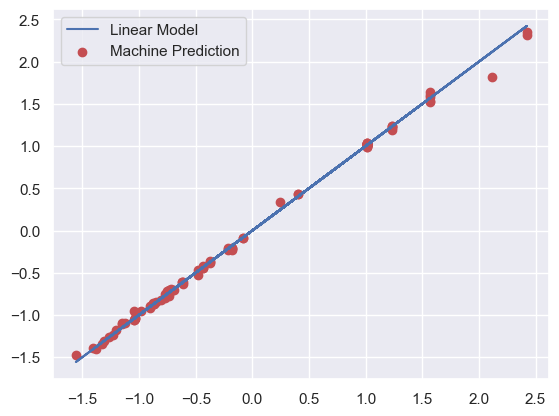

Machine Accuracy:  99.83241097669796 %


In [19]:
plt.plot(y_test, y_pred)
plt.scatter(y_test, pred, color="r")
plt.xlabel("y_test")
plt.ylabel("")
plt.legend(["Linear Model", "Machine Prediction"])
plt.show()

print ("Machine Accuracy: ", r2_score(y_test, pred) * 100, "%")

# Calculating the Error 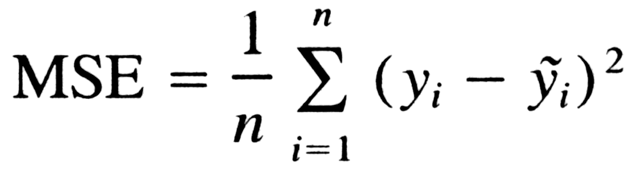

In [20]:
from sympy import *

# two matrices should be used: y_test and pred

pred = np.array(pred)
y_test = np.array(y_test)

new = pred - y_test

new = new * new

mean_squared_error = (np.sum(new) / len(new)) 
print (mean_squared_error)

209.0285009461907


In [21]:
root_mean_squared_error = np.sqrt(mean_squared_error)
print (root_mean_squared_error)

14.457817987033545


In [22]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [23]:
df["Thomas"] = "Thomas"

In [24]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'Thomas'],
      dtype='object')

In [25]:
df.duplicated().sum()

0

# Finding the covariance matrix

In [27]:
def cov(data):
    length = data.shape[0]
    covmat = (data.T.dot(data)) / length
    return covmat
covamat = cov(X)


In [29]:
covamat = np.round(covamat, 3)
covamat

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
RM,-0.219,0.312,-0.392,0.091,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469
PTRATIO,0.290,-0.392,0.383,-0.122,-0.356,0.262,-0.232,0.465,0.461,1.000,-0.177,0.374,-0.508


In [30]:
eigenvalues, eigenvectors = np.linalg.eig(covamat)
len(eigenvectors)

13

# 3-Dimensional Scatterplot

In [33]:
indexes = eigenvectors.argsort()[::-1]
eigenvalues = eigenvalues[indexes]
eigenvectors = eigenvectors[:, indexes]
sorted_eig_pairs = [(np.round(np.abs(eigenvalues[i]), 3), eigenvectors[:, i]) for i in range(len(eigenvalues))]

print ("\n Sorted Eign-pair(descending order)")

sorted_eigenvalues = []

for i in range(0, len(sorted_eig_pairs)):
    print ("eigenvec_{0} : {1}".format(str(i+1), str(sorted_eig_pairs[i][0])))
    sorted_eigenvalues.append(sorted_eig_pairs[i][0])

print ("\n Total Variance (sum of all eigenvalues) : ", np.round(sum(sorted_eigenvalues), 0))


 Sorted Eign-pair(descending order)
eigenvec_1 : [[[0.157 1.549 0.885 ... 0.2   5.895 0.248]
  [0.402 5.895 0.157 ... 1.549 0.885 0.2  ]
  [0.646 1.345 0.885 ... 0.157 5.895 0.821]
  ...
  [5.895 0.248 0.157 ... 0.061 0.513 0.277]
  [0.402 0.646 0.821 ... 0.513 0.277 1.345]
  [0.513 0.646 5.895 ... 0.402 0.277 1.345]]

 [[0.646 1.345 0.885 ... 0.157 5.895 0.821]
  [5.895 0.248 0.157 ... 0.061 0.513 0.277]
  [0.402 0.646 0.821 ... 0.513 0.277 1.345]
  ...
  [0.513 0.646 5.895 ... 0.402 0.277 1.345]
  [0.402 5.895 0.157 ... 1.549 0.885 0.2  ]
  [0.248 1.549 0.402 ... 0.2   5.895 1.345]]

 [[5.895 0.248 0.157 ... 0.061 0.513 0.277]
  [0.248 1.549 0.402 ... 0.2   5.895 1.345]
  [0.646 1.345 0.885 ... 0.157 5.895 0.821]
  ...
  [1.549 1.345 0.513 ... 0.646 0.821 0.885]
  [0.402 0.646 0.821 ... 0.513 0.277 1.345]
  [0.402 0.885 5.895 ... 0.277 0.646 0.821]]

 ...

 [[0.646 1.345 0.885 ... 0.157 5.895 0.821]
  [0.402 0.885 5.895 ... 0.277 0.646 0.821]
  [0.402 0.2   5.895 ... 0.513 0.061 0.2